In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 KB 4.1 MB/s eta 0:00:00


## Extracting Tweets

In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

#query = "(from:elonmusk) until:2020-01-01 since:2010-01-01 lang:en" # To get tweets from a particular user

query = "pepsi lang:en" # General twitter search

tweets = []
limit = 500 # number of tweets to be extracted


for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    #print(vars(tweet))
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.id, tweet.user.username, tweet.rawContent, tweet.replyCount, tweet.retweetCount, tweet.likeCount])
        
df = pd.DataFrame(tweets, columns=['Date','Tweet_id', 'Username', 'Tweet', 'no_of_replies', 'no_of_retweets','no_oflikes'])
df

,Date,Tweet_id,Username,Tweet,no_of_replies,no_of_retweets,no_oflikes
0,2023-01-23 05:54:20+00:00,1617400316760313856,FrostedYukio,@Pepsi_the_Cutie tfw no money for Engage,0,0,0
1,2023-01-23 05:53:56+00:00,1617400219716685824,EricaCochrane,@hey_ash21 pronouns: she/her\nheight: 5'9'' (t...,0,0,0
2,2023-01-23 05:53:17+00:00,1617400055983648769,andreyrublevs,@bondisteves i NEED TO PEE AND HAVE MORE PEPSI...,0,0,0
3,2023-01-23 05:53:09+00:00,1617400021317558277,kn1ghtglow,@ManicMoths Pepsi my uncle works for Pepsi,0,0,0
4,2023-01-23 05:53:03+00:00,1617399996894281729,inkchr0matic,"if you see it, do it!\n\npronouns; he/it\nheig...",0,0,0
...,...,...,...,...,...,...,...
495,2023-01-23 01:56:14+00:00,1617340399818792963,JasonCo58376343,@dallascowboys @pepsi Win or lose will JJ real...,0,0,0
496,2023-01-23 01:56:01+00:00,1617340343716024320,emilioguerras,https://t.co/1DJXjbYBdU\nAfter discussing the ...,0,0,0
497,2023-01-23 01:55:57+00:00,1617340327895130112,NintendoCraft_,@UtopiaDistrict Like most mine was Floral Shop...,0,0,0
498,2023-01-23 01:55:52+00:00,1617340307179245570,TacoTitsday,These are little Debbie Swiss cake rolls and m...,4,2,8


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/tweet.csv" # Change path here accordingly
df.to_csv(path, index = False)

## Creating Word Cloud

In [ ]:
df = pd.read_csv(path) # Or provide path
df.head()

,Date,Tweet_id,Username,Tweet,no_of_replies,no_of_retweets,no_oflikes
0,2023-01-23 05:54:20+00:00,1617400316760313856,FrostedYukio,@Pepsi_the_Cutie tfw no money for Engage,0,0,0
1,2023-01-23 05:53:56+00:00,1617400219716685824,EricaCochrane,@hey_ash21 pronouns: she/her\nheight: 5'9'' (t...,0,0,0
2,2023-01-23 05:53:17+00:00,1617400055983648769,andreyrublevs,@bondisteves i NEED TO PEE AND HAVE MORE PEPSI...,0,0,0
3,2023-01-23 05:53:09+00:00,1617400021317558277,kn1ghtglow,@ManicMoths Pepsi my uncle works for Pepsi,0,0,0
4,2023-01-23 05:53:03+00:00,1617399996894281729,inkchr0matic,"if you see it, do it!\n\npronouns; he/it\nheig...",0,0,0


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

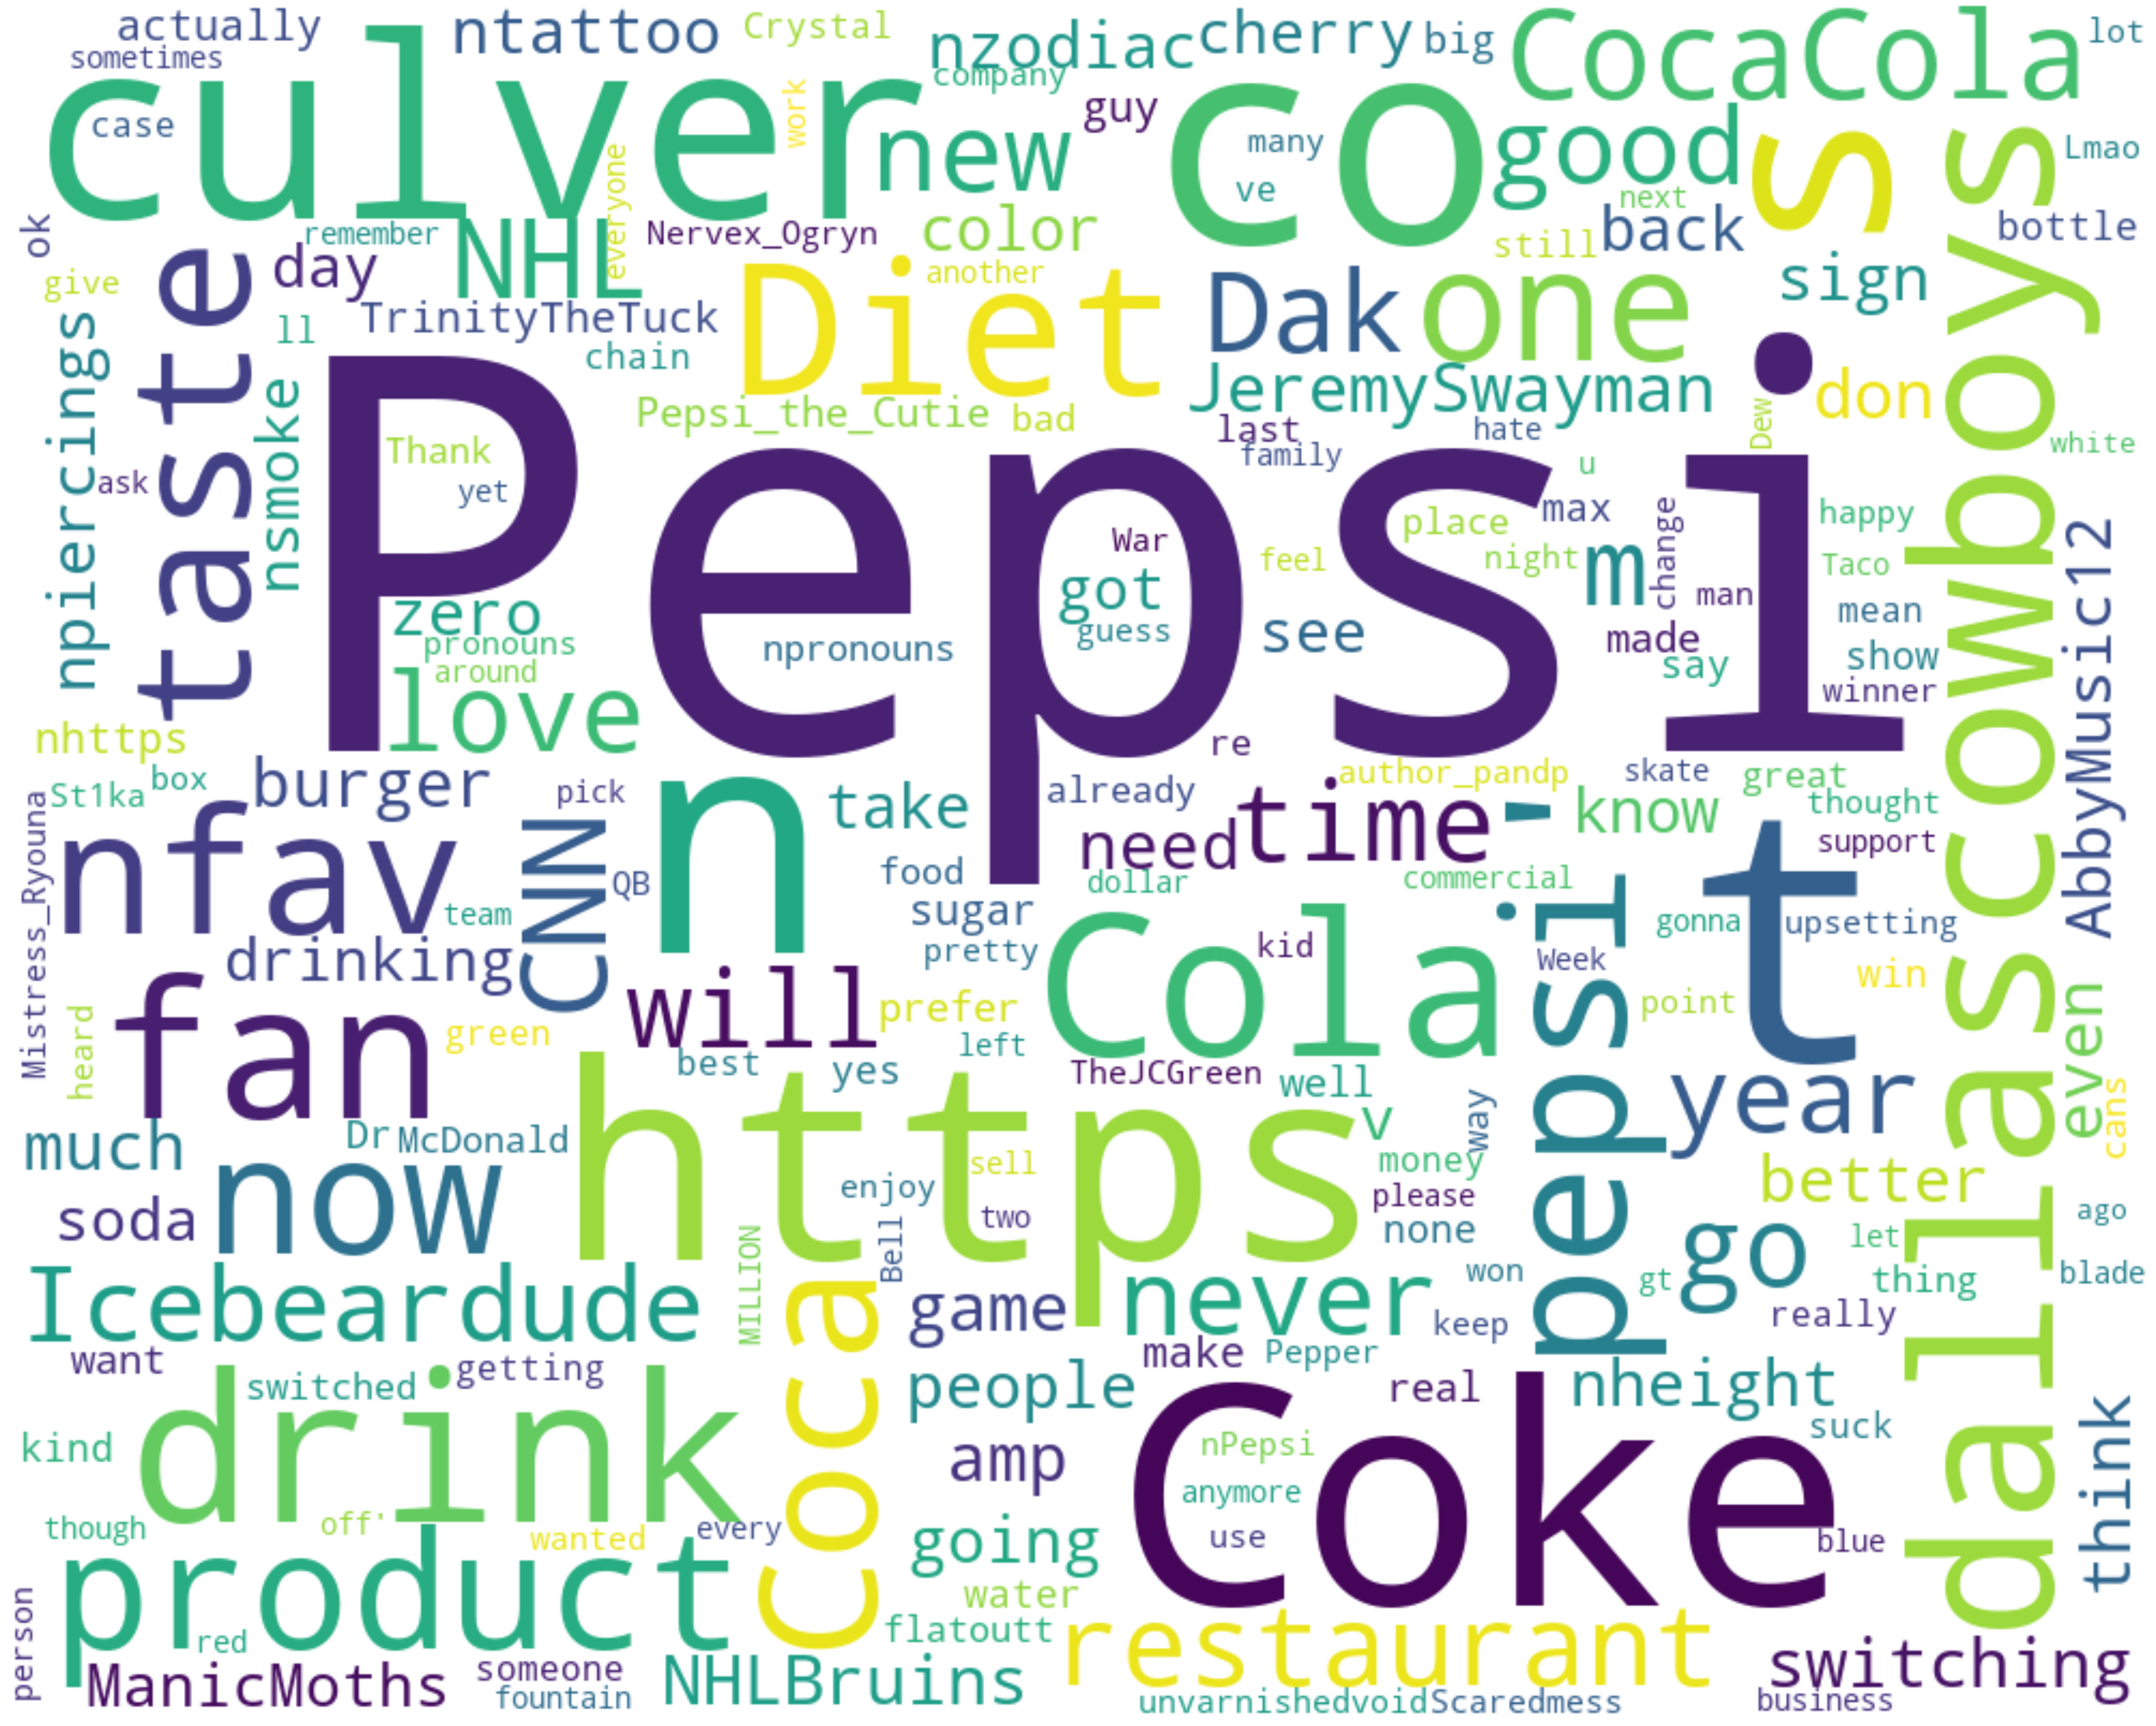

In [ ]:
text = df['Tweet'].values
plt.figure(figsize = (60,60))
word_cloud = WordCloud(width = 1000, height = 800,collocations = False, background_color = 'white').generate(str(text))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
word_cloud.to_file('/content/drive/MyDrive/Colab Notebooks/image.jpg')